In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [2]:
files = glob.glob('../Output/PCA/*.csv')
files.sort()

In [3]:
files = dict(enumerate(files))
files
#len(files)

{0: '../Output/PCA/BreastC Silhouette.csv',
 1: '../Output/PCA/BreastC acc.csv',
 2: '../Output/PCA/BreastC adjMI.csv',
 3: '../Output/PCA/BreastC2D.csv',
 4: '../Output/PCA/Faults Silhouette.csv',
 5: '../Output/PCA/Faults acc.csv',
 6: '../Output/PCA/Faults adjMI.csv',
 7: '../Output/PCA/Faults2D.csv',
 8: '../Output/PCA/SSE.csv',
 9: '../Output/PCA/logliklihood.csv'}

In [4]:
dfs = defaultdict(int)
for indx, f in files.items():
    dfs[indx] = pd.read_csv(f)

## Part 1: Clustering Analyses

K-means SSE - Both datasets:  **dfs[8]**

GMM Loglikelihood - Both datasets:  **dfs[9]**

Silhouette - BreastC:  **dfs[0]** 

acc - BreastC:  **dfs[1]**

adjMI - BreastC:  **dfs[2]**

Visualize dataset in 2D - Breast C:  **dfs[3]**

Silhouette - Faults:  **dfs[4]** 

acc - Faults:  **dfs[5]**

adjMI - Faults:  **dfs[6]**

Visualize dataset in 2D - Faults:  **dfs[7]**

In [5]:
km_SSE = dfs[8]
gmm_log = dfs[9]
bc_ss = dfs[0].T[1:]
bc_acc = dfs[1].T[1:]
bc_adjMI = dfs[2].T[1:]
bc_2d = dfs[3]

f_ss = dfs[4].T[1:]
f_acc = dfs[5].T[1:]
f_adjMI = dfs[6].T[1:]
f_2d = dfs[7]

# Choosing K
## K-Means SSE: (Breast Cancer & Faulty Plates)

In [6]:
km_SSE.columns = ['clusters','bc_sse','fp_sse']
x = km_SSE['clusters']
bc_y = km_SSE['bc_sse']
f_y = km_SSE['fp_sse']
km_SSE.head()

,clusters,bc_sse,fp_sse
0,2,2834.159303,17110.020333
1,3,2598.645366,15895.903978
2,4,2368.947049,14816.962936
3,5,2194.191496,13418.740675
4,6,2046.766724,12922.431658


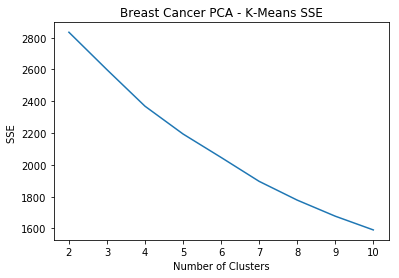

In [7]:
plt.plot(x,bc_y)
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer PCA - K-Means SSE')
plt.show()

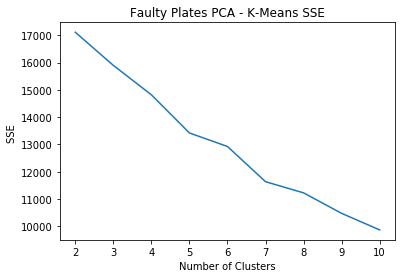

In [8]:
plt.plot(x,f_y)
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates PCA - K-Means SSE')
plt.show()

## EM Log-Likelihood: (Breast Cancer & Faulty Plates)

In [9]:
gmm_log.columns = ['clusters','bc_log','fp_log']
x = gmm_log['clusters']
bc_y = gmm_log['bc_log']
f_y = gmm_log['fp_log']
gmm_log.head()

,clusters,bc_log,fp_log
0,2,-9.204146,-13.907878
1,3,-8.642316,-12.893494
2,4,-8.485604,-9.216938
3,5,-8.442188,-8.790824
4,6,-8.218743,-7.728915


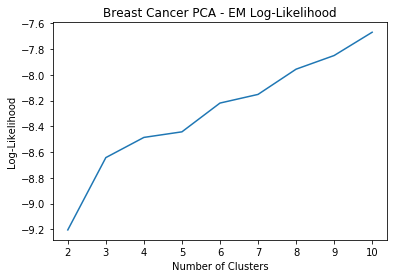

In [10]:
plt.plot(x,bc_y)
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer PCA - EM Log-Likelihood')
plt.show()

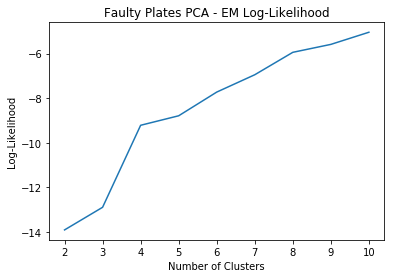

In [11]:
plt.plot(x,f_y)
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates PCA - EM Log-Likelihood')
plt.show()

# Breast Cancer Dataset

## Silhouette Score: K-Means and EM

In [12]:
bc_ss['clusters'] = bc_ss.index
bc_ss.columns = ['gmm_ss','km_ss','clusters']
x = bc_ss['clusters']
gmm_y = bc_ss['gmm_ss']
km_y = bc_ss['km_ss']
bc_ss.head()

,gmm_ss,km_ss,clusters
2,0.163082,0.165824,2
3,0.0573858,0.136651,3
4,0.0950897,0.135473,4
5,0.0933436,0.13702,5
6,0.0808086,0.146988,6


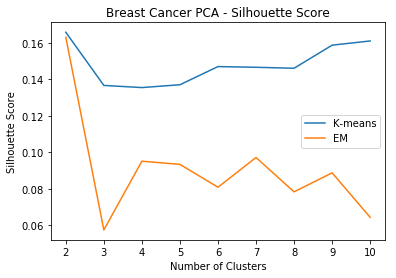

In [13]:
plt.plot(x,km_y, label="K-means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer PCA - Silhouette Score')
plt.legend()
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [14]:
bc_acc['clusters'] = bc_acc.index
bc_acc.columns = ['gmm_acc','km_acc','clusters']
x = bc_acc['clusters']
gmm_y = bc_acc['gmm_acc']
km_y = bc_acc['km_acc']
bc_acc.head()

,gmm_acc,km_acc,clusters
2,0.953846,0.958242,2
3,0.775824,0.905495,3
4,0.936264,0.87033,4
5,0.90989,0.896703,5
6,0.90989,0.936264,6


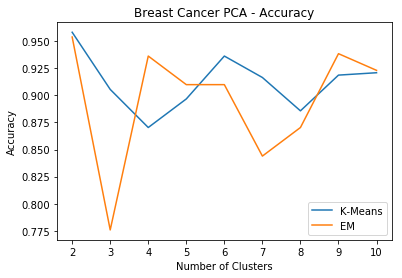

In [15]:
plt.plot(x,km_y, label = "K-Means")
plt.plot(x,gmm_y, label = "EM")
plt.ylabel("Accuracy")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer PCA - Accuracy')
plt.legend()
plt.show()

## Adjusted MI: K-Means and EM

In [16]:
bc_adjMI['clusters'] = bc_adjMI.index
bc_adjMI.columns = ['gmm_adjMI','km_adjMI','clusters']
x = bc_adjMI['clusters']
gmm_y = bc_adjMI['gmm_adjMI']
km_y = bc_adjMI['km_adjMI']

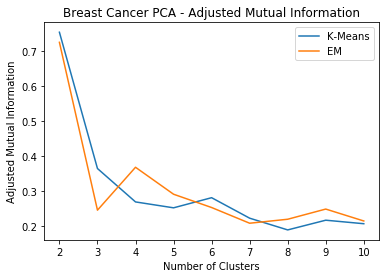

In [17]:
plt.plot(x,km_y, label="K-Means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Adjusted Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer PCA - Adjusted Mutual Information')
plt.legend()
plt.show()

# Faulty Plates Dataset

## Silhouette Score: K-Means and EM

In [18]:
f_ss['clusters'] = bc_ss.index
f_ss.columns = ['gmm_ss','km_ss','clusters']
x = f_ss['clusters']
gmm_y = f_ss['gmm_ss']
km_y = f_ss['km_ss']
f_ss.head()

,gmm_ss,km_ss,clusters
2,0.0828041,0.106253,2
3,0.0545498,0.135822,3
4,0.0486674,0.152479,4
5,0.116317,0.148865,5
6,0.114234,0.14574,6


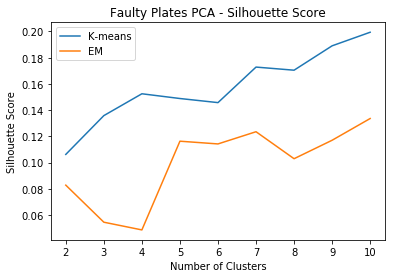

In [19]:
plt.plot(x,km_y, label="K-means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates PCA - Silhouette Score')
plt.legend()
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [20]:
f_acc['clusters'] = f_acc.index
f_acc.columns = ['gmm_acc','km_acc','clusters']
x = f_acc['clusters']
gmm_y = f_acc['gmm_acc']
km_y = f_acc['km_acc']
f_acc.head()

,gmm_acc,km_acc,clusters
2,0.349871,0.358892,2
3,0.414948,0.492268,3
4,0.507732,0.498711,4
5,0.564433,0.498711,5
6,0.574098,0.505155,6


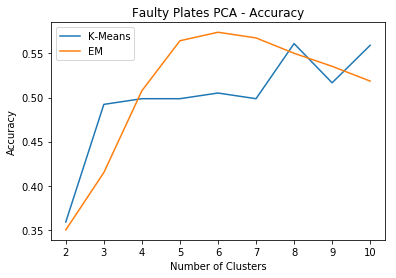

In [21]:
plt.plot(x,km_y, label = "K-Means")
plt.plot(x,gmm_y, label = "EM")
plt.ylabel("Accuracy")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates PCA - Accuracy')
plt.legend()
plt.show()

## Adjusted MI: K-Means and EM

In [22]:
f_adjMI['clusters'] = f_adjMI.index
f_adjMI.columns = ['gmm_adjMI','km_adjMI','clusters']
x = f_adjMI['clusters']
gmm_y = f_adjMI['gmm_adjMI']
km_y = f_adjMI['km_adjMI']

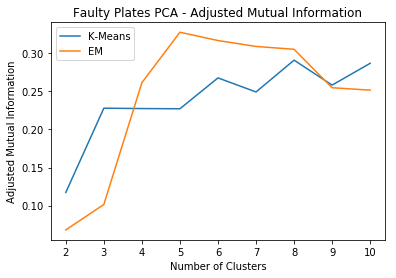

In [23]:
plt.plot(x,km_y, label="K-Means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Adjusted Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates PCA - Adjusted Mutual Information')
plt.legend()
plt.show()

## 2D Visualizaion

In [24]:
f_2d.columns = ['data','x','y','target']
f_2d.head()

,data,x,y,target
0,0,13.620507,5.509843,Dirtiness
1,1,10.594874,-12.354280,Bumps
2,2,4.472137,2.375968,Dirtiness
3,3,-12.963349,-4.614427,Other_Faults
4,4,4.875815,-4.036985,Stains


## PCA Analyses

In [25]:
files1 = glob.glob('../Output/PCA/PCA/*scree.csv')
files1.sort()

In [26]:
files1 = dict(enumerate(files1))
files1

{0: '../Output/PCA/PCA/bc scree.csv', 1: '../Output/PCA/PCA/faults scree.csv'}

In [27]:
dfs1 = defaultdict(int)
for indx, f in files1.items():
    dfs1[indx] = pd.read_csv(f,names = ["Components","Variation"])

In [28]:
# bc_cluster = dfs1[0]
bc_scree = dfs1[0][:15]
# f_cluster = dfs1[2]
f_scree = dfs1[1][:15]

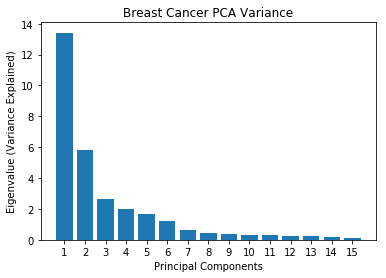

In [29]:
height = bc_scree["Variation"]
bars = bc_scree["Components"]
y_pos = np.arange(len(bars))
plt.ylabel("Eigenvalue (Variance Explained)")
plt.xlabel("Principal Components")
plt.title('Breast Cancer PCA Variance')
plt.bar(y_pos,height)
plt.xticks(y_pos, bars)
plt.show()

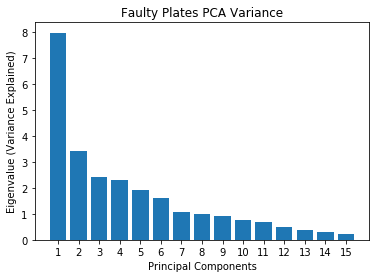

In [30]:
height = f_scree["Variation"]
bars = f_scree["Components"]
y_pos = np.arange(len(bars))
plt.ylabel("Eigenvalue (Variance Explained)")
plt.xlabel("Principal Components")
plt.title('Faulty Plates PCA Variance')
plt.bar(y_pos,height)
plt.xticks(y_pos, bars)
plt.show()

## Dimensional Reduction Neural Network

In [31]:
files2 = glob.glob('../Output/PCA/PCA/*red.csv')
files2.sort()

files2 = dict(enumerate(files2))
files2

dfs2 = defaultdict(int)
for indx, f in files2.items():
    dfs2[indx] = pd.read_csv(f)

In [32]:
files2

{0: '../Output/PCA/PCA/bc dim red.csv',
 1: '../Output/PCA/PCA/faults dim red.csv'}

In [33]:
bc_cl = dfs2[0]
f_cl = dfs2[1]

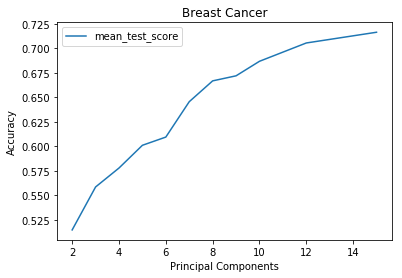

In [34]:
x = f_cl["param_pca__n_components"]
y = f_cl["mean_test_score"]

plt.plot(x,y)
plt.ylabel("Accuracy")
plt.xlabel("Principal Components")
plt.title('Breast Cancer')
plt.legend()
plt.show()